# Health Insurance Cost Analysis with Linear Regression

## Introduction
In this project, I conducted a comprehensive analysis of health insurance costs using exploratory data analysis techniques and applied a linear regression model to predict medical costs for new customers. My goal was to understand the relationships among various variables such as age, gender, smoking status, body mass index (BMI), number of children, and region, and how these variables influence health insurance costs.

## Summary:

1. **Exploratory Data Analysis:** I started by loading the data from the "insurance.csv" dataset and performing initial data analysis. This included examining descriptive statistics, identifying missing values, and converting categorical variables into numerical formats to prepare the data for analysis.

2. **Data Visualization:** To gain insights into the data, I employed various visualizations, such as count plots, bar plots, and heatmaps. These visuals helped me understand distributions, relationships, and correlations among different variables. Notably, I investigated how factors like gender, smoking habits, and region contribute to insurance costs.

3. **Data Preparation:** I transformed categorical variables into numerical representations to make them suitable for regression analysis. Subsequently, I split the data into training and testing sets to assess the model's performance effectively.

4. **Linear Regression Model:** Utilizing linear regression, I developed a predictive model that estimates medical costs based on selected independent variables. The model was trained using the training data, and its predictive capabilities were evaluated using the test dataset.

5. **Model Evaluation:** I evaluated the model's performance using the R-squared metric, which gauges the proportion of variance in costs explained by the independent variables.

6. **Predictions:** Applying the trained model, I generated cost predictions for a new customer by inputting values for attributes like age, BMI, number of children, smoking status, and region. These predictions offer an estimation of the health insurance cost for the prospective customer.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Caminho para o arquivo CSV
caminho_arquivo = r'C:\Users\natha\My spcae\Data_Science\Datasets\insurance.csv'

# Carregar o arquivo CSV em um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

In [3]:
# Mostrar as primeiras linhas do conjunto de dados
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Verificar o número de linhas e colunas no conjunto de dados
df.shape

(1338, 7)

In [5]:
# Obter informações sobre as colunas do conjunto de dados, como tipos e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Verificar a presença de valores nulos em cada coluna
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Exibir as colunas presentes no conjunto de dados
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# Exibir estatísticas descritivas das colunas numéricas do conjunto de dados
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


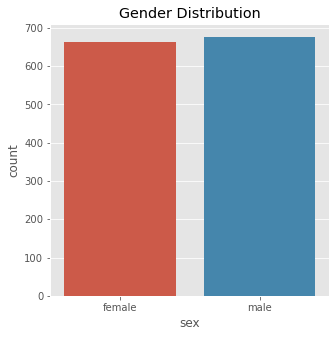

In [9]:
# Visualizar a distribuição de gênero usando um gráfico de contagem
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

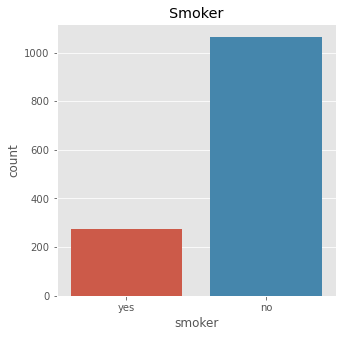

In [10]:
# Visualizar a distribuição de fumantes usando um gráfico de contagem
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

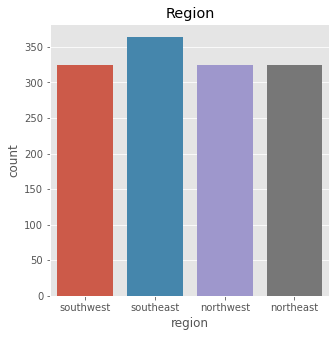

In [11]:
# Visualizar a distribuição de regiões usando um gráfico de contagem
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

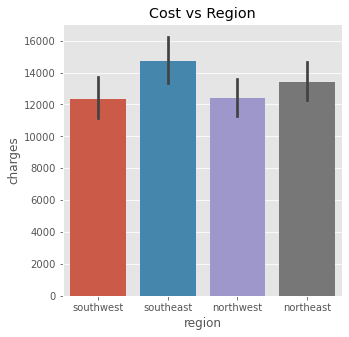

In [12]:
# Visualizar a relação entre custo e região usando um gráfico de barras
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')


Text(0.5, 1.0, 'Charges for smokers')

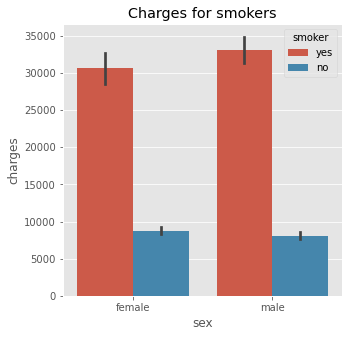

In [13]:
# Visualizar a relação entre custo, gênero e fumante usando um gráfico de barras
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

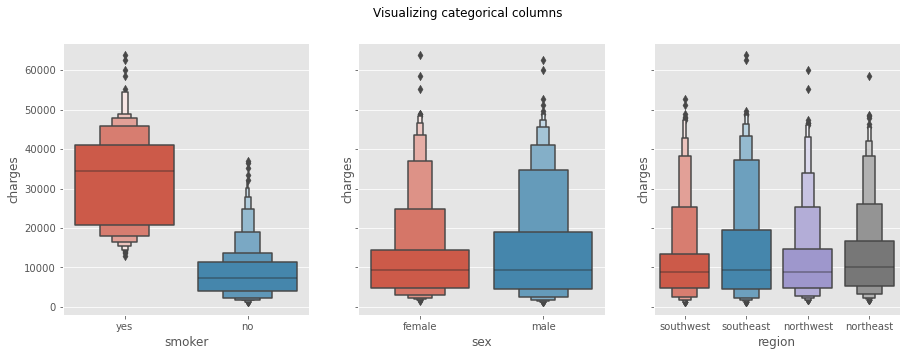

In [14]:
# Criar uma figura com três subplots lado a lado, onde cada subplot representa uma categoria categórica
# Figura com largura de 15 unidades e altura de 5 unidades, compartilhando o mesmo eixo y entre os subplots
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])


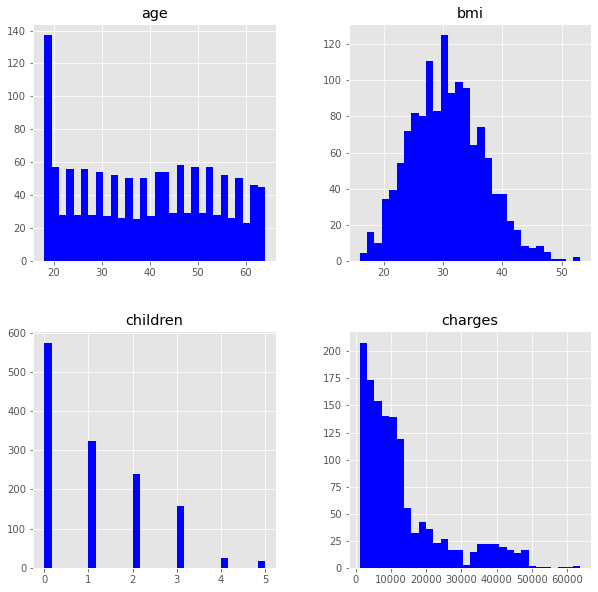

In [15]:
# Visualizar distribuições e dispersões das colunas numéricas selecionadas usando histogramas
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# Transformar colunas categóricas em valores numéricos
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


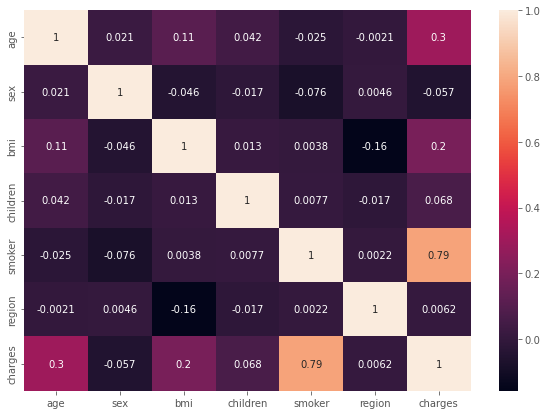

In [19]:
# Visualizar a matriz de correlação entre as colunas numéricas usando um mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [20]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [21]:
# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shpae:  (936,)
y_test shape:  (402,)


In [22]:
# Criar uma instância de regressão linear
linreg = LinearRegression()

In [23]:
# Treinar o modelo de regressão linear com os dados de treinamento
linreg.fit(X_train, y_train)
# Fazer previsões usando o modelo treinado
pred = linreg.predict(X_test)

In [24]:
# Importar a métrica R2 para avaliar o desempenho do modelo
from sklearn.metrics import r2_score

In [25]:
# Calcular e imprimir o valor do coeficiente de determinação R2
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7697211527941855


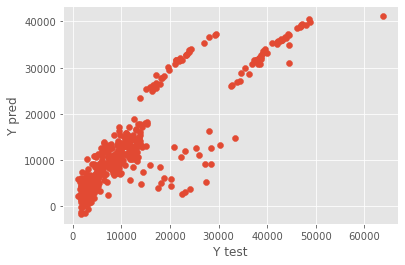

In [26]:
# Plotar um gráfico de dispersão entre os valores reais e as previsões
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [27]:
# Criar um DataFrame para representar um novo cliente
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [28]:
# Fazer uma previsão de custo médico para o novo cliente usando o modelo treinado
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33206.92756082]


## Conclusion

Through this project, I delved into the intricate web of factors influencing health insurance costs. The integration of data visualization techniques and the application of a linear regression model allowed me to unravel hidden trends and patterns shaping costs. Ultimately, this project yielded a predictive model capable of estimating medical costs for new clients based on their individual characteristics. The synergy between exploratory analysis and statistical modeling deepened my understanding of the health insurance landscape and the multifaceted influences underpinning individual costs.